(In order to load the stylesheet of this notebook, execute the last code cell in this notebook)

# Clustering food recipes from around the world

In this assignment, you are expected to hierarchically cluster food recipes. We will be using YY Ahn's dataset "[Recipe datasets with cuisines](http://yongyeol.com/data/scirep-cuisines-detail.zip)", which for each recipe provides a list of ingredients and the country of origin, scraped from popular recipe websites. He also provides an [ingredient and compounds dataset](http://yongyeol.com/data/ingr_comp.zip), which you could potentially also make use of, if you find it interesting.

You will be graded as follow:
* Data parsing and representation **(20 pts)**
* Clustering **(30 pts)**
* Visualization **(30 pts)**
* Short (datailed) analysis of specific cluster **(20 pts)**

---------------------------

In [18]:
# import pandas as pd
# import seaborn as sns
# from matplotlib import pyplot as plt

# import sklearn.preprocessing as process
# import sklearn.datasets as sk_data
# import sklearn.metrics as metrics
# from sklearn.cluster import KMeans
# import numpy as np

import time

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd
import sklearn.datasets as datasets
import sklearn.metrics as metrics
import scipy.sparse.linalg as linalg
import scipy.cluster.hierarchy as hr

import sklearn.cluster as cluster

from sklearn.decomposition import TruncatedSVD

from scipy.spatial.distance import pdist, squareform
from sklearn.preprocessing import StandardScaler

#import matplotlib as mpl
import seaborn as sns
%matplotlib inline

In [52]:
food = open('scirep-cuisines-detail/allr_recipes.txt').read().split('\n')

#Creates initial dictionary for dataframe
foods = {} 


for line in food:
    l = line.split() 
    ctry = l[0]
    ingr = l[1:]
    
    for ingrs in ingr:
        if (ingrs not in foods.keys()):
            foods[ingrs] = {}
        if (ctry not in foods[ingrs].keys()):
            
            foods[ingrs][ctry] = 1
        else: 
            foods[ingrs][ctry] += 1
            


ingredients_df= pd.DataFrame(foods).fillna(value=0) 

ingredients_df




,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,artichoke,asparagus,avocado,...,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
American,1443,1,91,11,1837,8,360,218,265,217,...,115,222,938,551,295,17,15,2544,598,657
Austria,5,0,0,0,1,0,3,0,0,0,...,0,1,0,0,0,0,0,0,0,0
Bangladesh,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Belgium,2,0,0,0,0,0,0,0,0,0,...,1,0,2,1,0,0,0,2,0,0
Canada,28,0,0,0,28,0,2,1,6,7,...,2,3,23,16,3,0,1,52,15,9
Caribbean,3,0,2,0,2,0,0,0,0,5,...,0,0,11,1,0,0,0,5,2,3
China,8,0,0,0,2,0,2,0,2,0,...,0,0,3,0,13,0,0,4,0,0
East-African,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
Eastern-Europe,6,0,1,0,7,0,6,0,1,0,...,4,3,3,1,0,0,0,37,1,0
France,9,0,2,0,6,2,3,2,5,1,...,0,2,41,4,6,0,0,22,1,4


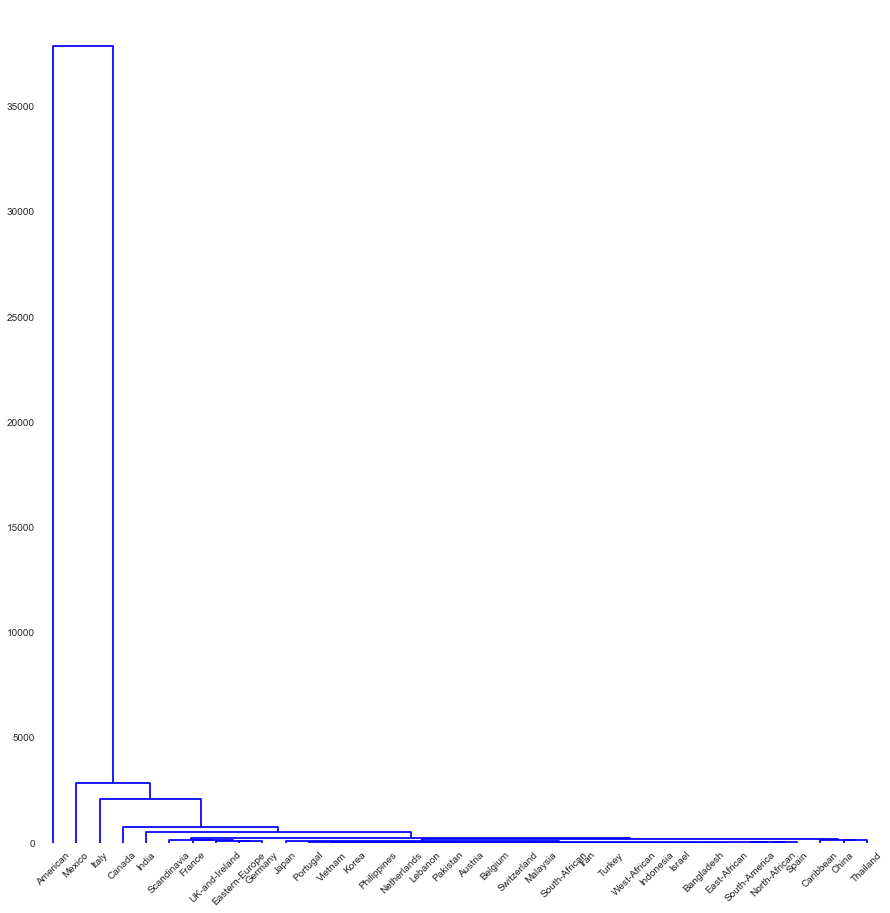

In [63]:
distanceMatrix = pdist(ingredients_df,'euclidean')
Z = hr.linkage(ingredients_df, method='average', metric='euclidean')

fig = plt.figure(figsize=(15,15))
T = hr.dendrogram(Z,color_threshold=0.5, leaf_font_size=10, labels=ingredients_df.index)
fig.show()

 References

1. Ahn, Yong-Yeol, et al. "Flavor network and the principles of food pairing." Scientific reports 1 (2011).

In [98]:
# Code for setting the style of the notebook
from IPython.core.display import HTML
def css_styling():
    styles = open("../../theme/custom.css", "r").read()
    return HTML(styles)
css_styling()